# HW4 - KNN Classifier
##### 負責助教：王培霖 barry84090371@gmail.com

這次的作業將帶大家實做KNN模型，用一些健康報告來判斷此人是否患有糖尿病

## 資料簡介

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

資料來源：UCI Machine Learning

## 參數介紹
### Feature
   * Pregnancies：Number of times pregnant
   * Glucose：Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   * BloodPressure：Diastolic blood pressure (mm Hg)
   * SkinThickness：Triceps skin fold thickness (mm)
   * Insulin：2-Hour serum insulin (mu U/ml)
   * BMIBody：mass index (weight in kg/(height in m)^2)
   * DiabetesPedigreeFunction：Diabetes pedigree function
   * Age：Age (years)

### Target
   * Outcome：Class variable (0 or 1) 268 of 768 are 1, the others are 0

## 評分標準
### 原始分數
* 上課繳交：20%
    * 在當天 16:20 前上傳至 new E3 作業，請將以下打包成 .zip 上傳：
        * 程式原始檔 (.ipynb）
        * 程式 .html 檔
    * 並填寫表單上傳程式執行結果
        * 請上傳 .html 檔案至表單
        * __請統一檔名 <學號>-<姓名>.html__
        * [表單連結](https://docs.google.com/forms/d/e/1FAIpQLSdlbNU_u9kb1QpCdXsgX42gx6UcRYCtVnX4E0xVlkjYyEOgug/viewform)
* 程式分數：80%

### 調整分數
* 你的調整分數 = (你的原始分數 - 全部人原始分數平均) x (15. / 全部人原始分數標準差) + 80.

#### 姓名：林哲宇
#### 學號：0616018

## Packages that Might Be Used

In [86]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.colors import ListedColormap
%matplotlib inline

### 相關連結

* Packages
    * [numpy](http://www.numpy.org/)
    * [pandas](https://pandas.pydata.org/)
    * [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    * [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
    * [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.kneighbors_graph)
    * [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
    * [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
    * [pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
* Markdown
    * jupyter 可以支援 markdown 區塊，方便打上文字說明此份 notebook 在做的事情
    * [wiki](https://zh.wikipedia.org/wiki/Markdown)
    * [教學](https://markdown.tw/)

## Load data - 10%
### 回答問題 - 10%

請簡述以下問題，將ans取代為你的答案

1. x後面參數的意思為何?  - 5%
    * 從第一欄到倒數第二欄
2. y後面參數的意思為何? - 5%
    * 最後一欄

In [87]:
df = pd.read_csv('diabetes.csv')
index_name = df.columns.values

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

## Statistics - 10%
### 回答問題 - 10%

請簡述以下問題，將ans取代為你的答案

1. y做的這個function功能為何? 印出的結果代表甚麼?  - 10%
    * iloc 是把需要的 column 與 row 取出來，前面的 : 代表所有的 row，後面的 -1 代表只要最後一個 column，所以 df.iloc[:,-1] 的意思是取出 df 中 index 的最後一項，也就是 Outcome，並且把所有的 row 取出來

In [88]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Preprocessing - 10%
### 回答問題 - 10%

請簡述以下問題，將ans取代為你的答案

1. 請解釋train_test_split功能(包含後面的參數)以及為何要做這個步驟? - 10%
    * train_test_split 是用來把現有資料順序打亂並分成 training data 和 testing data，第一個參數代表 Feature; 第二個參數代表 Target，第三個參數代表 testing data 的比例，最後一個代表亂數子(random seed)。做此動作是為了分配測試資料以及讓資料分布不會過度偏激

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=43)

transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

## Training - 70%
### KNN - 25%
### 1.請建立50個KNN模型，令k=1~50
### 2.畫出以每個K值(x軸)對準確率(y軸)的圖表
### 3.印出準確率及準確率最高的k

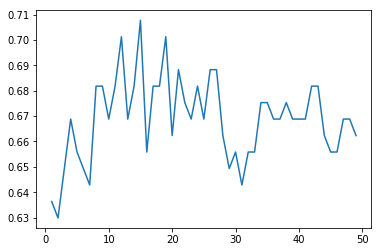

('k for max acc:', 14, '\nMax acc:', 0.7077922077922078)


In [90]:
num_of_neighbor = [i for i in range(1,50)]
acc = []
for i in num_of_neighbor:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    acc.append(metrics.accuracy_score(y_test, neigh.predict(X_test)))
    
plt.plot(num_of_neighbor,acc)
plt.show()
print('k for max acc:',acc.index(max(acc)),'\nMax acc:',max(acc))


### 4.畫出KNN模型的 Confuxsion Matrix 並將 Classification Report印出 - 5%
Hint - 以下 function 取自[連結](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)，可以將 confusion matrix 畫出

In [91]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(confusion_matrix, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(20, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Confusion matrix, without normalization


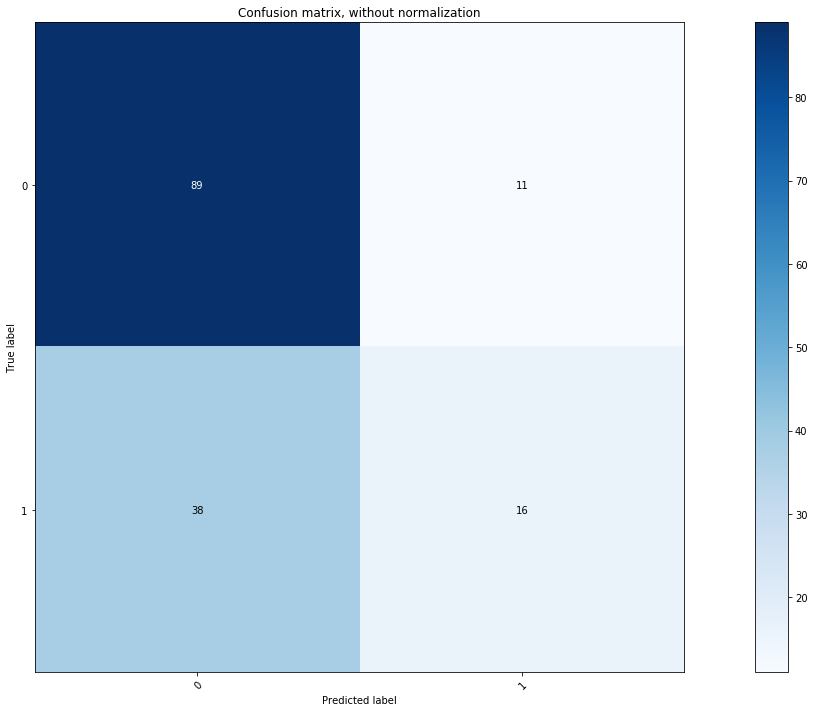

              precision    recall  f1-score   support

           0       0.70      0.89      0.78       100
           1       0.59      0.30      0.40        54

   micro avg       0.68      0.68      0.68       154
   macro avg       0.65      0.59      0.59       154
weighted avg       0.66      0.68      0.65       154



In [92]:
neigh = KNeighborsClassifier(n_neighbors=14)
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
plot_confusion_matrix(confusion_matrix(y_test, y_pred), [0, 1])
print(classification_report(y_test, y_pred, [0, 1], ['0', '1']))

### 5.PCA -> KNN - 30%
先用PCA將data降至j維(j為1~8)，再將其作KNN並觀察正確率(可以拿上面寫好的KNN來用!)所以這裡其實只要寫PCA就好

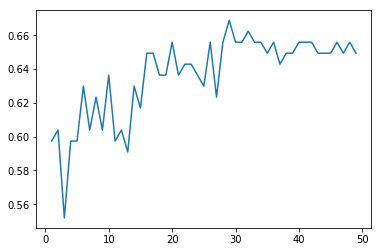

('k for max acc:', 28, '\nMax acc:', 0.6688311688311688)


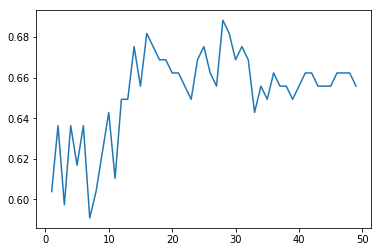

('k for max acc:', 27, '\nMax acc:', 0.6883116883116883)


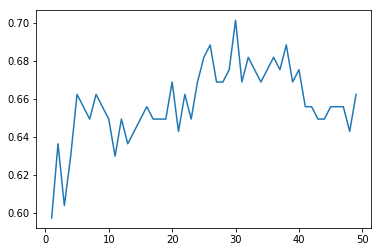

('k for max acc:', 29, '\nMax acc:', 0.7012987012987013)


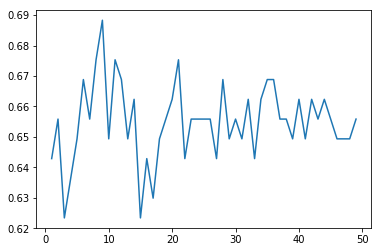

('k for max acc:', 8, '\nMax acc:', 0.6883116883116883)


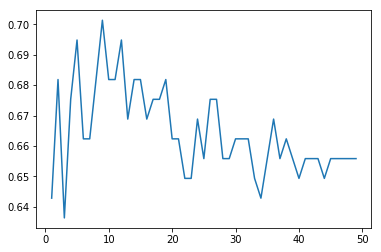

('k for max acc:', 8, '\nMax acc:', 0.7012987012987013)


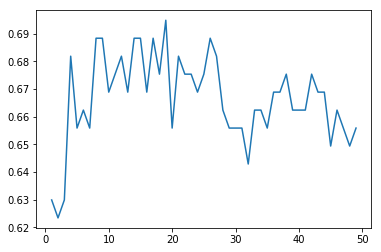

('k for max acc:', 18, '\nMax acc:', 0.6948051948051948)


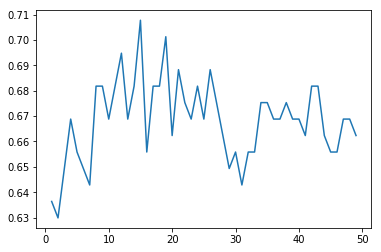

('k for max acc:', 14, '\nMax acc:', 0.7077922077922078)


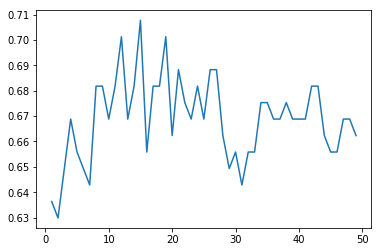

('k for max acc:', 14, '\nMax acc:', 0.7077922077922078)


In [93]:
for j in range(1,9):
    pca = PCA(n_components=j)
    pca.fit(X_train)
    X_train_low = pca.transform(X_train)
    X_test_low=pca.transform(X_test)
    
    acc = []
    for i in num_of_neighbor:
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train_low, y_train)
        acc.append(metrics.accuracy_score(y_test, neigh.predict(X_test_low)))

    plt.plot(num_of_neighbor,acc)
    plt.show()
    print('k for max acc:',acc.index(max(acc)),'\nMax acc:',max(acc))


### 6.選兩個最能分出兩種類別的X，將圖印出後紀錄a,b是哪兩個colunm - 10%
想了解的同學請前往以下[連結](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

In [94]:
def decision_boundry(X,y,a,b):

    X = df.iloc[:,[a,b]]
    X = np.array(X)
    h= 1


    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    clf = KNeighborsClassifier(n_neighbors=14)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (14, 'MLE'))

    plt.show()


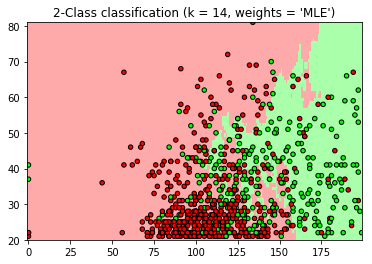

a:Glucose, b:Age


In [95]:
'''Choose the most fit number'''
decision_boundry(X,y,1,7)
print("a:{0}, b:{1}".format("Glucose", "Age"))